In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from scipy import stats

%matplotlib inline

In [37]:
df = pd.read_csv('data/RRCA_baseflow.csv')
df

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689
...,...,...,...,...,...,...,...,...
15586,721810,98,721870,14387040,0.00,0.00,0.0,0.298500
15587,721841,98,721870,14387040,0.00,0.00,0.0,0.211475
15588,721871,98,721870,14387040,0.00,0.00,0.0,0.122951
15589,721902,98,721870,14387040,0.00,0.00,0.0,0.120000


In [38]:
# 42 unique river sections (segments)
# looks like dates from about 1941 to 2000, looks like measurements taken once a month
# evapotranspiration = movement of water from soil to air through evaporation or transpiration in the area 
# adjacent to the river a given month
# precipitation is in a given month in adjacent area
# irrigation pumping = amount of water pumped for farming from the groundwater adjacent in a given month
# observed baseflow is amount of groundwater entering a stream
# this dataset is from the Republican River Basin in Colorado, Kansas, and Nebraska. 
# treat segment_id and x,y as a cateogry
df

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689
...,...,...,...,...,...,...,...,...
15586,721810,98,721870,14387040,0.00,0.00,0.0,0.298500
15587,721841,98,721870,14387040,0.00,0.00,0.0,0.211475
15588,721871,98,721870,14387040,0.00,0.00,0.0,0.122951
15589,721902,98,721870,14387040,0.00,0.00,0.0,0.120000


<Axes: xlabel='Segment_id', ylabel='Observed'>

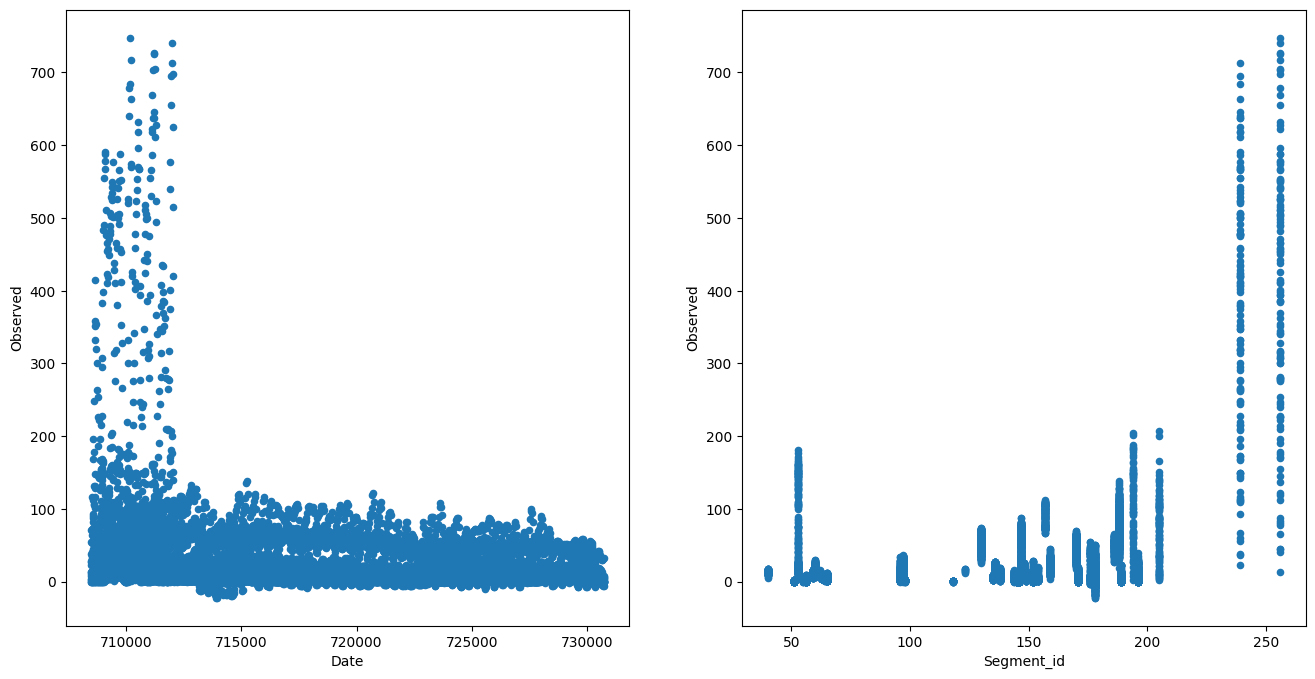

In [39]:
fig, axs = plt.subplots(1, 2)
df.plot(kind='scatter', x='Date', y='Observed', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Segment_id', y='Observed', ax=axs[1])


<Axes: xlabel='y', ylabel='Observed'>

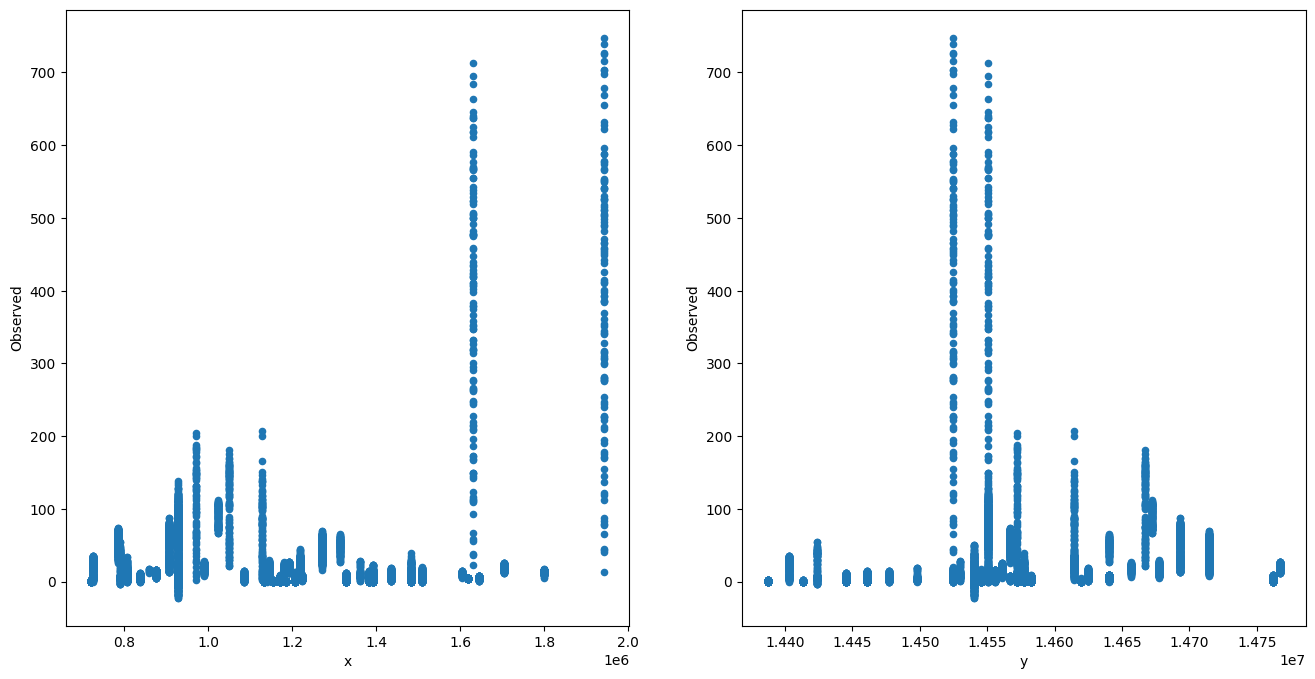

In [40]:
fig, axs = plt.subplots(1, 2)
df.plot(kind='scatter', x='x', y='Observed', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='y', y='Observed', ax=axs[1])

<Axes: xlabel='Irrigation_pumping', ylabel='Observed'>

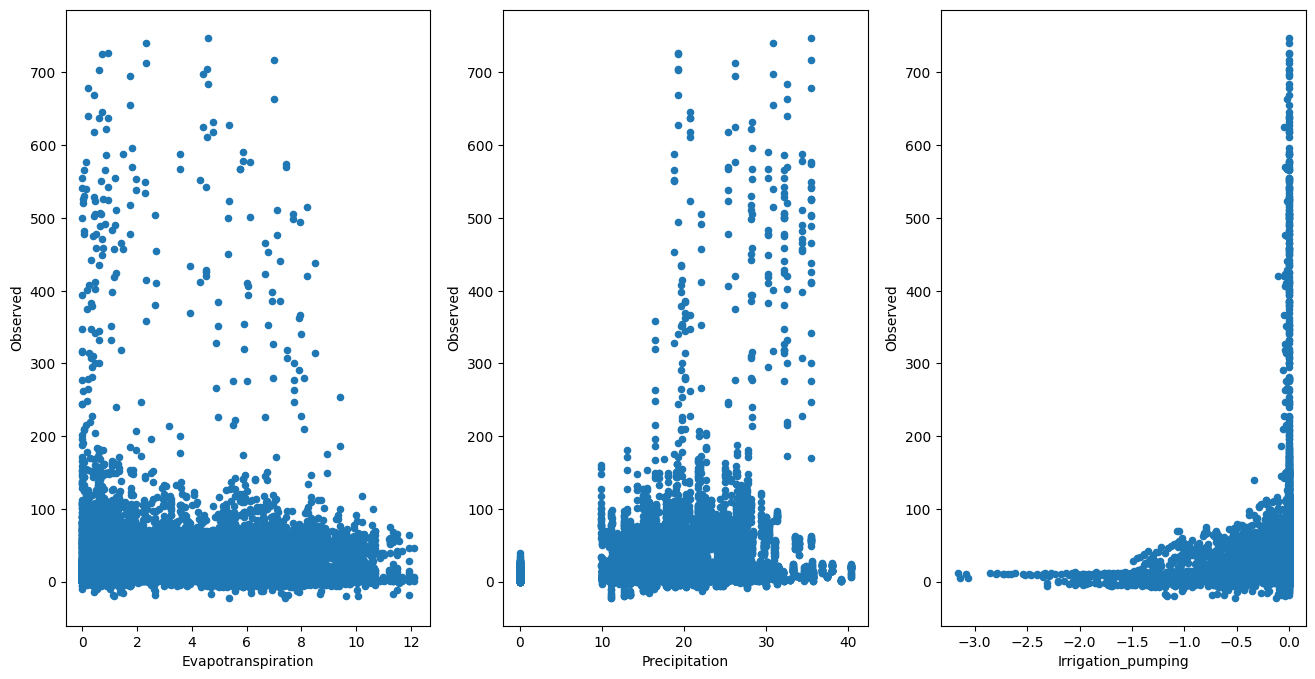

In [41]:
fig, axs = plt.subplots(1, 3)
df.plot(kind='scatter', x='Evapotranspiration', y='Observed', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Precipitation', y='Observed', ax=axs[1])
df.plot(kind='scatter', x='Irrigation_pumping', y='Observed', ax=axs[2])

In [42]:
df['x,y']  = '0'
for i in range(len(df)):
    df.iat[i,8] = str(df.iloc[i]['x']) + ',' + str(df.iloc[i]['y'])

In [43]:
df

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,"x,y"
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161,"1086190,14476800"
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161,"1086190,14476800"
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203,"1086190,14476800"
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203,"1086190,14476800"
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689,"1086190,14476800"
...,...,...,...,...,...,...,...,...,...
15586,721810,98,721870,14387040,0.00,0.00,0.0,0.298500,"721870,14387040"
15587,721841,98,721870,14387040,0.00,0.00,0.0,0.211475,"721870,14387040"
15588,721871,98,721870,14387040,0.00,0.00,0.0,0.122951,"721870,14387040"
15589,721902,98,721870,14387040,0.00,0.00,0.0,0.120000,"721870,14387040"


In [44]:
df2 = df.groupby('x,y').agg({'Segment_id': 'mean'}).reset_index()
df2
df3 = df2.groupby('Segment_id').count().reset_index()
df3
# so segments 53, 152, 159, and 171 each have two stations in them

,Segment_id,"x,y"
0,40.0,1
1,51.0,1
2,53.0,2
3,55.0,1
4,56.0,1
5,59.0,1
6,60.0,1
7,62.0,1
8,63.0,1
9,64.0,1


In [45]:
df2

,"x,y",Segment_id
0,"1022830,14672160",157.0
1,"1049230,14666880",53.0
2,"1086190,14476800",144.0
3,"1128430,14614080",205.0
4,"1133710,14619360",55.0
5,"1138990,14497920",154.0
6,"1144270,14677440",60.0
7,"1154830,14413440",51.0
8,"1170670,14582400",56.0
9,"1181230,14656320",159.0


<Axes: xlabel='Precipitation', ylabel='Evapotranspiration'>

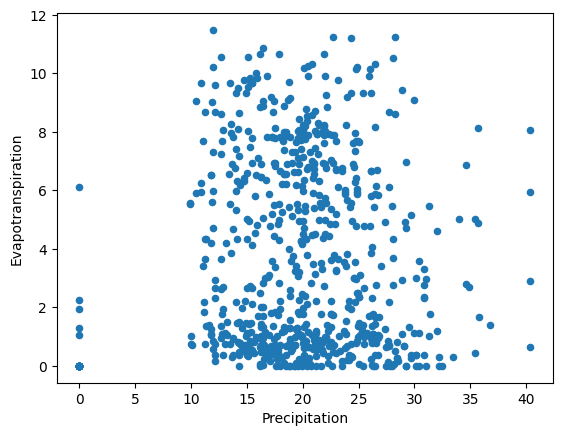

In [46]:
df.sample(1000).plot(kind='scatter', x='Precipitation', y='Evapotranspiration')

In [47]:
(r,p) = stats.pearsonr(df.Precipitation, df.Evapotranspiration)
print(f"Total: \t\t{r=:.5}\t{p=:.3}")


Total: 		r=0.42849	p=0.0


In [48]:
# create a fitted model with all three features
lm = smf.ols(formula='Observed ~ Precipitation + Irrigation_pumping', data=df).fit()

# print the coefficients
display(lm.params)

# print a summary of the fitted model
lm.summary()

Intercept              3.050265
Precipitation          1.527290
Irrigation_pumping    20.325257
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     700.4
Date:                Tue, 21 Mar 2023   Prob (F-statistic):          5.07e-292
Time:                        12:36:35   Log-Likelihood:                -84287.
No. Observations:               15591   AIC:                         1.686e+05
Df Residuals:                   15588   BIC:                         1.686e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.0503      0.751      4.062      0.000       1.578       4.522
Precipitation          1.5273      0.042     36.741      0.000       1.446       1.609
Irrigation_pumping    20.3253      1.597     12.731      0.000      17.196      23.455
==============================================================================
Omnibus:                    19551.866   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2754526.628
Skew:                           6.996   Prob(JB):                         0.00
Kurtosis:                      66.596   Cond. No.                         67.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Total: 		r=-0.23402	p=5.95e-193


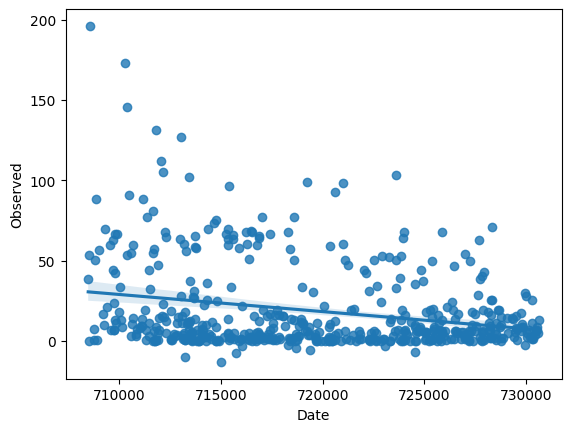

In [49]:
df144 = df[df.Segment_id == 144]
dfout = df[df.Observed < 200]
ax = sns.regplot(data=dfout.sample(500), x='Date', y='Observed')
(r,p) = stats.pearsonr(df.Date, df.Observed)
print(f"Total: \t\t{r=:.5}\t{p=:.3}")


In [50]:
df['Date'] = df['Date'] - 693963

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,"x,y"
0,16769,144,1086190,14476800,0.59,18.99,0.0,0.145161,"1086190,14476800"
1,16800,144,1086190,14476800,0.97,29.63,0.0,0.445161,"1086190,14476800"
2,16828,144,1086190,14476800,1.34,29.63,0.0,1.332203,"1086190,14476800"
3,16859,144,1086190,14476800,1.79,29.63,0.0,2.932203,"1086190,14476800"
4,16889,144,1086190,14476800,8.23,29.63,0.0,3.728689,"1086190,14476800"
...,...,...,...,...,...,...,...,...,...
15586,27847,98,721870,14387040,0.00,0.00,0.0,0.298500,"721870,14387040"
15587,27878,98,721870,14387040,0.00,0.00,0.0,0.211475,"721870,14387040"
15588,27908,98,721870,14387040,0.00,0.00,0.0,0.122951,"721870,14387040"
15589,27939,98,721870,14387040,0.00,0.00,0.0,0.120000,"721870,14387040"


In [53]:
df['Date'].min()

14516